# CNN model 

### Loading the dataset

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import numpy as np

In [165]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

### Define the constants

In [85]:
DATA_SLICE_SIZE = 100
ANOMALY_INJECTION_SAMPLE_SIZE = 4000

In [86]:
def multiple_plotting(path_list):
    n_paths = len(path_list)
    data_df_list = []

    if n_paths == 0:
        print("Insert the correct paths!")

    # let last column vacant if the # of paths are odd
    vacant_col = n_paths % 2 != 0

    for path in path_list:
        data_df = pd.read_csv(path, header=None)
        data_df.columns = ['x', 'y', 'z']
        data_df_list.append(data_df)


    #################### Do not touch the logic
    n_rows = n_paths // 2
    if vacant_col:
        n_rows += 1
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(8, 2 * n_rows))


    for ax in axes.flatten():
        ax.set_ylim(0.6, 1.4)

    cur_df = 0

    # For edge case: only for one or two path list
    if n_paths <= 2:
        if not vacant_col:
            vector_value_2 = np.sqrt(data_df_list[1]['x']**2 + data_df_list[1]['y']**2 + data_df_list[1]['z']**2)
            axes[1].plot(vector_value_2)
        vector_value_1 = np.sqrt(data_df_list[0]['x']**2 + data_df_list[0]['y']**2 + data_df_list[0]['z']**2)
        axes[0].plot(vector_value_1)
        return

    # For Normal case: more than two path list
    for i in range(n_rows):
        for j in range(2):
            # Check whether last col should be vacant or not
            if i == n_paths // 2 and j == 1 and vacant_col:
                axes[i, j].axis('off')
                continue
            ##
            vector_value = np.sqrt(data_df_list[cur_df]['x']**2 + data_df_list[cur_df]['y']**2 + data_df_list[cur_df]['z']**2)
            axes[i, j].plot(vector_value)

            cur_df += 1
    ####################

    plt.show()

In [5]:
# Insert data paths in one list
multiple_plotting(['data/normal_9v_data.csv', 'data/normal_10v_data.csv',
                   'data/normal_11v_data.csv', 'data/normal_12v_data.csv',
                   'data/normal_11v_data.csv',])

FileNotFoundError: [Errno 2] No such file or directory: 'data/normal_9v_data.csv'

In [87]:
import glob
file_paths = glob.glob('./data/anomaly_data_new/*.csv')

df_list = []

for file in file_paths:
    data_df = pd.read_csv(file, header=None)

    data_df = data_df[:ANOMALY_INJECTION_SAMPLE_SIZE]
    df_list.append(data_df)

anomaly_df = pd.concat(df_list, ignore_index=True)
anomaly_df.columns = ['x', 'y', 'z']

In [88]:
anomaly_df.shape

(188000, 3)

### Add normal datasets

In [6]:
data_normal_9v_df = pd.read_csv('data/normal_9v_data.csv', header=None)
data_normal_10v_df = pd.read_csv('data/normal_10v_data.csv', header=None)
data_normal_11v_df = pd.read_csv('data/normal_11v_data.csv', header=None)
data_normal_12v_df = pd.read_csv('data/normal_12v_data.csv', header=None)
data_normal_9v_common_noise_df = pd.read_csv('./data/normal_9v_common_noise_data.csv', header=None)
data_normal_9v_vibration_noise_df = pd.read_csv('./data/normal_9v_vibration_noise_data.csv', header=None)

# data_normal_9v_df = scaler.fit_transform(data_normal_9v_df)
# data_normal_10v_df = scaler.fit_transform(data_normal_10v_df)
# data_normal_11v_df = scaler.fit_transform(data_normal_11v_df)
# data_normal_12v_df = scaler.fit_transform(data_normal_12v_df)
# data_normal_9v_common_noise_df = scaler.fit_transform(data_normal_9v_common_noise_df)
# data_normal_9v_vibration_noise_df = scaler.fit_transform(data_normal_9v_vibration_noise_df)

combined_df = pd.concat([data_normal_9v_df, data_normal_10v_df,
                          data_normal_11v_df, data_normal_12v_df,
                          data_normal_9v_common_noise_df, data_normal_9v_vibration_noise_df], ignore_index=True)
print(combined_df.shape)

(960578, 3)


### Split data

In [89]:
import os

folder_path = 'data/normal_data_new'

normal_data_path = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

print(normal_data_path)

data_splits = []
all_anomaly_test_data = []
for data in normal_data_path:
    df = pd.read_csv(data)
    df = df[:len(df) - (len(df) % 100)]
    data_splits.append(df.values.reshape(-1, 100, 3))
    # print(df.shape)

for i in range(len(data_splits)):
    print(data_splits[i].shape)

['data/normal_data_new/normal_10v_data7.csv', 'data/normal_data_new/normal_9v_data2.csv', 'data/normal_data_new/normal_9v_data3.csv', 'data/normal_data_new/normal_10v_data.csv', 'data/normal_data_new/normal_10v_data6.csv', 'data/normal_data_new/normal_10v_data4.csv', 'data/normal_data_new/normal_9v_data1.csv', 'data/normal_data_new/normal_10v_data5.csv', 'data/normal_data_new/normal_10v_data1.csv', 'data/normal_data_new/normal_9v_data4.csv', 'data/normal_data_new/normal_9v_data5.csv', 'data/normal_data_new/normal_10v_data2.csv', 'data/normal_data_new/normal_9v_data7.csv', 'data/normal_data_new/normal_9v_data6.csv', 'data/normal_data_new/normal_10v_data3.csv', 'data/normal_data_new/normal_12v_data6.csv', 'data/normal_data_new/normal_12v_data7.csv', 'data/normal_data_new/normal_11v_data.csv', 'data/normal_data_new/normal_12v_data5.csv', 'data/normal_data_new/normal_9v_common_noise_data.csv', 'data/normal_data_new/normal_12v_data4.csv', 'data/normal_data_new/normal_12v_data1.csv', 'data/n

In [90]:
import glob
train_ratio = 0.7
temp_ratio = 0.3  # for both val and test combined
val_ratio = 0.5  # 50% of temp_ratio for validation
test_ratio = temp_ratio / 2  # same as val_ratio

# data_normal_12v_df = data_normal_12v_df[:len(data_normal_12v_df) - (len(data_normal_12v_df) % DATA_SLICE_SIZE)]
# data_normal_9v_vibration_noise_df = data_normal_9v_vibration_noise_df[:len(data_normal_9v_vibration_noise_df) - (len(data_normal_9v_vibration_noise_df)% DATA_SLICE_SIZE)]
# print(len(data_normal_9v_df), len(data_normal_10v_df), len(data_normal_11v_df), len(data_normal_12v_df))
# print(data_normal_9v_df.shape, data_normal_10v_df.shape, data_normal_11v_df.shape, data_normal_12v_df.shape)

# print(data_normal_9v_df.shape)
# print(data_normal_10v_df.shape)
# print(data_normal_11v_df.shape)
# print(data_normal_12v_df.shape)
# print(data_normal_9v_common_noise_df.shape)
# print(data_normal_9v_vibration_noise_df.shape)


# data_normal_9v_split = np.array_split(data_normal_9v_df, len(data_normal_9v_df) // DATA_SLICE_SIZE)
# data_normal_10v_split = np.array_split(data_normal_10v_df, len(data_normal_10v_df) // DATA_SLICE_SIZE)
# data_normal_11v_split = np.array_split(data_normal_11v_df, len(data_normal_11v_df) // DATA_SLICE_SIZE)
# data_normal_12v_split = np.array_split(data_normal_12v_df, len(data_normal_12v_df) // DATA_SLICE_SIZE)
# data_normal_9v_common_noise_split = np.array_split(data_normal_9v_common_noise_df, len(data_normal_9v_common_noise_df) // DATA_SLICE_SIZE)
# data_normal_9v_vibration_noise_split = np.array_split(data_normal_9v_vibration_noise_df, len(data_normal_9v_common_noise_df) // DATA_SLICE_SIZE)


anomaly_file_paths = glob.glob('./data/anomaly_data_new/*.csv')

anomaly_splits = []
anomaly_splits_test = []
for file in anomaly_file_paths:
    data_df = pd.read_csv(file, header=None)
    print("file name", file)

    data_df = data_df[:len(data_df) - (len(data_df) % DATA_SLICE_SIZE)]
    # print(data_df.shape)
    data_df_quarter = data_df.iloc[:len(data_df) // 2] 
    data_df_split = np.array_split(data_df_quarter, len(data_df_quarter) // DATA_SLICE_SIZE)

    data_df_quarter_test = data_df.iloc[len(data_df) // 2:] 
    data_df_split_test = np.array_split(data_df_quarter_test, len(data_df_quarter_test) // DATA_SLICE_SIZE)

    anomaly_splits_test.append(data_df_split_test)
    anomaly_splits.append(data_df_split)
    # print(y_label_1_.shape)
    # print("aaa", len(data_df_split))

# print("anomaly shape ", anomaly_splits.shape)

# data_splits = [data_normal_9v_split, data_normal_10v_split,
#                 data_normal_11v_split, data_normal_11v_split,
#                 data_normal_9v_common_noise_split,
#                 data_normal_9v_vibration_noise_split]

y_label_0_raw = []
y_label_1_raw = []
y_label_1_raw_test = []

for i in data_splits:
    print(len(i))
    y_label_0 = np.zeros(len(i))
    y_label_0_raw.append(y_label_0)

for i in anomaly_splits:
    # print(i.shape)
    y_label_1 = np.ones(len(i))
    y_label_1_raw.append(y_label_1)

for i in anomaly_splits_test:
    # print(i.shape)
    y_label_1_test = np.ones(len(i))
    y_label_1_raw_test.append(y_label_1_test)

anomaly_splits_test_raw = np.concatenate(anomaly_splits_test, axis = 0)


y_label_0_raw = np.concatenate(y_label_0_raw, axis=0)
y_label_1_raw = np.concatenate(y_label_1_raw, axis=0)
y_label_1_raw_test = np.concatenate(y_label_1_raw_test, axis=0)
print(len(y_label_0_raw), len(y_label_1_raw), len(y_label_1_raw_test))



y_label_raw = np.concatenate((y_label_0_raw, y_label_1_raw), axis = 0)
print(y_label_raw.shape)
data_splits.extend(anomaly_splits)
# print(len(anomaly_splits), len(data_splits))

train_sizes = []
train_data = []
val_data = []
test_data = []

y_train_data = []
y_val_data = []
y_test_data = []
start_idx = 0

for i in range(len(data_splits)):
    data_len = len(data_splits[i])
    train_size = int(data_len * train_ratio)
    temp_size = data_len - train_size 
    val_size = int(temp_size * val_ratio)
    
    # Split the data
    train_sizes.append(train_size)
    train_data.append(data_splits[i][:train_size])
    val_data.append(data_splits[i][train_size:train_size + val_size])
    test_data.append(data_splits[i][train_size + val_size:])

    y_train_data.append(y_label_raw[start_idx:start_idx + train_size])
    y_val_data.append(y_label_raw[start_idx + train_size:start_idx + train_size + val_size])
    y_test_data.append(y_label_raw[start_idx + train_size + val_size:start_idx + data_len])

    start_idx += data_len



# print("ddd", len(train_data[-1][-1]), len(val_data[-1][-1]),  len(test_data[-1][-1]))

# check the lengths of each split
for i in range(len(data_splits)):
    print(f"Data split {i}: train + val + test =", len(train_data[i]), "+", len(val_data[i]), "+", len(test_data[i]))
    print(len(train_data[i][0]), len(val_data[i][0]),  len(test_data[i][0]))

# Concatenate all splits across the normal datasets
x_train_concat = np.concatenate(train_data, axis=0)
x_val_concat = np.concatenate(val_data, axis=0)
x_test_concat = np.concatenate(test_data, axis=0)

y_train_concat = np.concatenate(y_train_data, axis=0)
y_val_concat = np.concatenate(y_val_data, axis=0)
y_test_concat = np.concatenate(y_test_data, axis=0)

# Output shapes to assure correct shape
print("Train data shape:", x_train_concat.shape)
print("Validation data shape:", x_val_concat.shape)
print("Test data shape:", x_test_concat.shape)

print("Train data shape:", y_train_concat.shape)
print("Validation data shape:", y_val_concat.shape)
print("Test data shape:", y_test_concat.shape)


print("anomaly_splits_test_raw.shape ", anomaly_splits_test_raw.shape, y_label_1_raw_test.shape)



file name ./data/anomaly_data_new/anomaly_7v_data3.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_11v_data3.csv
file name ./data/anomaly_data_new/anomaly_contact_11v_data2.csv
file name ./data/anomaly_data_new/anomaly_contact_11v_data3.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_11v_data2.csv
file name ./data/anomaly_data_new/anomaly_7v_data2.csv
file name ./data/anomaly_data_new/anomaly_contact_11v_data1.csv
file name ./data/anomaly_data_new/anomaly_7v_data1_o.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future v

file name ./data/anomaly_data_new/anomaly_unbalanced_11v_data1.csv
file name ./data/anomaly_data_new/anomaly_7v_data1.csv
file name ./data/anomaly_data_new/anomaly_tape_contact_data_o.csv
file name ./data/anomaly_data_new/anomaly_unstable_data_o.csv
file name ./data/anomaly_data_new/anomaly_contact_12v_data1_o.csv
file name ./data/anomaly_data_new/anomaly_5v_data2.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future v

file name ./data/anomaly_data_new/anomaly_5v_data3.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_12v_data1_o.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


file name ./data/anomaly_data_new/anomaly_5v_data1.csv
file name ./data/anomaly_data_new/anomaly_7v_data2_o.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_9v_data1.csv
file name ./data/anomaly_data_new/anomaly_3v_data1.csv
file name ./data/anomaly_data_new/anomaly_3v_data3.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_9v_data3.csv
file name ./data/anomaly_data_new/anomaly_3v_data2_o.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future v

file name ./data/anomaly_data_new/anomaly_unbalanced_9v_data2.csv
file name ./data/anomaly_data_new/anomaly_3v_data2.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_10v_data3.csv
file name ./data/anomaly_data_new/anomaly_contact_10v_data2.csv
file name ./data/anomaly_data_new/anomaly_on_off_data_o.csv
file name ./data/anomaly_data_new/anomaly_contact_10v_data3.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_10v_data2.csv
file name ./data/anomaly_data_new/anomaly_contact_10v_data1.csv
file name ./data/anomaly_data_new/anomaly_5v_data2_o.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_10v_data1.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future v

file name ./data/anomaly_data_new/anomaly_contact_9v_data1_o.csv
file name ./data/anomaly_data_new/anomaly_3v_data1_o.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


file name ./data/anomaly_data_new/anomaly_unbalanced_9v_data1_o.csv
file name ./data/anomaly_data_new/anomaly_contact_9v_data3.csv
file name ./data/anomaly_data_new/anomaly_contact_12v_data3.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_12v_data2.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_12v_data3.csv
file name ./data/anomaly_data_new/anomaly_contact_12v_data2.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future v

file name ./data/anomaly_data_new/anomaly_contact_9v_data2.csv
file name ./data/anomaly_data_new/anomaly_5v_data1_o.csv
file name ./data/anomaly_data_new/anomaly_unbalanced_12v_data1.csv
file name ./data/anomaly_data_new/anomaly_contact_12v_data1.csv
file name ./data/anomaly_data_new/anomaly_wind_noise_data_o.csv
file name ./data/anomaly_data_new/anomaly_contact_9v_data1.csv
1800
1800
1800
1799
1800
1800
1799
1799
1799
1800
1800
1799
1800
1798
1800
1764
1800
1799
1799
1199
1800
1805
1800
1799
1799
1805
1799
1200
1800
1800
1799
1800
1800
1799


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future v

59959 14370 14370
(74329,)
Data split 0: train + val + test = 1260 + 270 + 270
100 100 100
Data split 1: train + val + test = 1260 + 270 + 270
100 100 100
Data split 2: train + val + test = 1260 + 270 + 270
100 100 100
Data split 3: train + val + test = 1259 + 270 + 270
100 100 100
Data split 4: train + val + test = 1260 + 270 + 270
100 100 100
Data split 5: train + val + test = 1260 + 270 + 270
100 100 100
Data split 6: train + val + test = 1259 + 270 + 270
100 100 100
Data split 7: train + val + test = 1259 + 270 + 270
100 100 100
Data split 8: train + val + test = 1259 + 270 + 270
100 100 100
Data split 9: train + val + test = 1260 + 270 + 270
100 100 100
Data split 10: train + val + test = 1260 + 270 + 270
100 100 100
Data split 11: train + val + test = 1259 + 270 + 270
100 100 100
Data split 12: train + val + test = 1260 + 270 + 270
100 100 100
Data split 13: train + val + test = 1258 + 270 + 270
100 100 100
Data split 14: train + val + test = 1260 + 270 + 270
100 100 100
Data spl

In [91]:
from keras.utils import to_categorical

# Convert y_train and y_valid to one-hot encoding
y_train_one_hot = to_categorical(y_train_concat, num_classes=2)  # Assuming classes are 0, 1
y_valid_one_hot = to_categorical(y_val_concat, num_classes=2)  # Assuming you have a similar y_valid
y_test_one_hot = to_categorical(y_test_concat, num_classes=2)  # Assuming you have a similar y_test

# Check the shape
print(y_train_one_hot.shape)  # Should be (10070, 4)
print(y_valid_one_hot.shape) 
print(y_test_one_hot.shape) 

(52021, 2)
(11137, 2)
(11171, 2)


In [92]:
# Sum along axis 0 to get the count of each class
class_counts = np.sum(y_train_one_hot, axis=0)

# Calculate the percentage of each class
class_ratios = class_counts / np.sum(class_counts)

# Print the results
for i, (count, ratio) in enumerate(zip(class_counts, class_ratios)):
    print(f"Class {i}: count = {int(count)}, ratio = {ratio:.2%}")

Class 0: count = 41965, ratio = 80.67%
Class 1: count = 10056, ratio = 19.33%


In [93]:
import tensorflow as tf
import keras
from keras.layers import LSTM, Dropout, Dense, InputLayer
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [94]:
model = keras.models.Sequential([
    # Conv Block 1 
    keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu",
                        input_shape=[100, 3]),
    keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"), 

    # Pooling layer
    keras.layers.MaxPooling1D(pool_size=2),

    # Conv Block 2 
    keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"),
    keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"),           
    
    # Pooling layer
    keras.layers.MaxPooling1D(pool_size=2),  

    # Conv Block 3
    keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"),
    keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"),   
    
    # Pooling layer        
    keras.layers.MaxPooling1D(pool_size=2),  

    # Conv Block 4
    # keras.layers.Conv1D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"),

    keras.layers.GlobalAveragePooling1D(),

    # Updated output layer for multi-class classification
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")  
])

# Compile the model
model.compile(loss="binary_crossentropy",  # Use categorical crossentropy
              optimizer="adam",
              metrics=["accuracy"])  # Accuracy metric is still appropriate

# # Train the model
# history = model.fit(
#     x_train_concat, y_train_one_hot,  # Ensure y_train is one-hot encoded for multi-class
#     epochs=20,  
#     batch_size=32,
#     validation_data=(x_val_concat, y_valid_one_hot),
#     verbose=1,
#     # class_weight=class_weights_dict,
#     # callbacks=[early_stop]
# )

# # Get predictions
# y_pred = model.predict(x_test_concat)
# y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Train the model
history = model.fit(
    x_train_concat, y_train_concat,  # Ensure y_train is one-hot encoded for multi-class
    epochs=20,  
    batch_size=64,
    validation_data=(x_val_concat, y_val_concat),
    verbose=1,
    # class_weight=class_weights_dict,
    # callbacks=[early_stop]
)

# Get predictions
y_pred = model.predict(x_test_concat)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# # Save the model
model.save("conv_net_new_data_anomaly_15p_add_normal_and_anomaly_4.h5")


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8749 - loss: 0.3243 - val_accuracy: 0.9758 - val_loss: 0.0611
Epoch 2/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9873 - loss: 0.0400 - val_accuracy: 0.9972 - val_loss: 0.0150
Epoch 3/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9908 - loss: 0.0321 - val_accuracy: 0.9972 - val_loss: 0.0243
Epoch 4/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9868 - loss: 0.0397 - val_accuracy: 0.9981 - val_loss: 0.0111
Epoch 5/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9979 - val_loss: 0.0085
Epoch 6/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9943 - loss: 0.0195 - val_accuracy: 0.9978 - val_loss: 0.0073
Epoch 7/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9947 - loss: 0.0167 - val_accuracy: 0.9974 - val_loss: 0.0067
Epoch 8/20
813/813 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accura

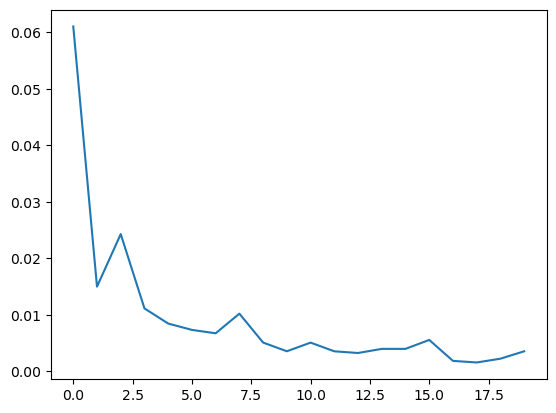

In [95]:

plt.plot(history.history["val_loss"])

In [96]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_36 (Conv1D)              │ (None, 100, 32)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_37 (Conv1D)              │ (None, 100, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_38 (Conv1D)              │ (None, 50, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_39 (Conv1D)              │ (None, 50, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_40 (Conv1D)              │ (None, 25, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_41 (Conv1D)              │ (None, 25, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_6      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337,829 (1.29 MB)

 Trainable params: 112,609 (439.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 225,220 (879.77 KB)

In [97]:
loss, accuracy = model.evaluate(x_test_concat, y_test_concat, verbose=1)
print(loss)
print(accuracy)

350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: nan
nan
0.9990153312683105


In [98]:
y_test_concat.shape

(11171,)

In [99]:
loss, accuracy = model.evaluate(anomaly_splits_test_raw, y_label_1_raw_test, verbose=1)
print(loss)
print(accuracy)

450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9970 - loss: 0.0096
0.006323570851236582
0.9978427290916443


In [100]:
y_label_1_raw_test.shape

(14370,)

In [101]:
y_pred = model.predict(anomaly_splits_test_raw, verbose=1)

print(y_pred[:10])
print(y_label_1_raw_test[:10])

450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[0.99884087]
 [0.9281857 ]
 [0.9996723 ]
 [0.9978824 ]
 [0.99979335]
 [0.9995409 ]
 [0.9995492 ]
 [0.9980515 ]
 [0.9990086 ]
 [0.9994675 ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [174]:
y_pred = model.predict(x_test_concat, verbose=1)

print(y_pred[:10])
print(y_test_concat[:10])

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[9.9731541e-01 6.2370417e-04 2.0609689e-03]
 [9.9957550e-01 1.0131643e-04 3.2326195e-04]
 [9.3877333e-01 3.9682076e-03 5.7258498e-02]
 [9.6514094e-01 1.8984770e-03 3.2960553e-02]
 [9.9768603e-01 4.1098875e-04 1.9029751e-03]
 [9.9929160e-01 1.6895907e-04 5.3948828e-04]
 [9.9943495e-01 1.0805808e-04 4.5704952e-04]
 [7.2029099e-02 1.4383234e-02 9.1358769e-01]
 [3.5445338e-01 1.6174611e-02 6.2937194e-01]
 [8.1945711e-01 1.2141216e-02 1.6840173e-01]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [191]:
import numpy as np

# y_pred의 형태 확인 및 정수형으로 변환
if y_pred.ndim == 2:
    y_pred = np.argmax(y_pred, axis=1)
elif y_pred.ndim == 1:
    print("y_pred는 이미 클래스 인덱스입니다.")

# y_test 및 y_pred의 고유 클래스 추출
unique_classes = np.unique(np.concatenate((y_test_concat, y_pred)))  # 두 배열의 고유 클래스 합치기

# 클래스 인덱스를 0부터 시작하도록 조정
class_to_index = {cls: idx for idx, cls in enumerate(unique_classes)}
y_test_mapped = np.array([class_to_index[cls] for cls in y_test_concat])
y_pred_mapped = np.array([class_to_index[cls] for cls in y_pred])


print(len(y_test_mapped))
print(len(y_pred_mapped))
# 혼동 행렬 초기화
num_classes = len(unique_classes)
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

# 혼동 행렬 계산
for i in range(len(y_test_concat)):
    conf_matrix[y_test_mapped[i], y_pred_mapped[i]] += 1

# 혼동 행렬 출력
print("혼동 행렬:\n", conf_matrix)

1734
16956
혼동 행렬:
 [[1440    0]
 [ 294    0]]


350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(11171, 1) (11171,)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8997
         1.0       1.00      1.00      1.00      2174

    accuracy                           1.00     11171
   macro avg       1.00      1.00      1.00     11171
weighted avg       1.00      1.00      1.00     11171

Confusion Matrix:
[[8988    9]
 [   2 2172]]


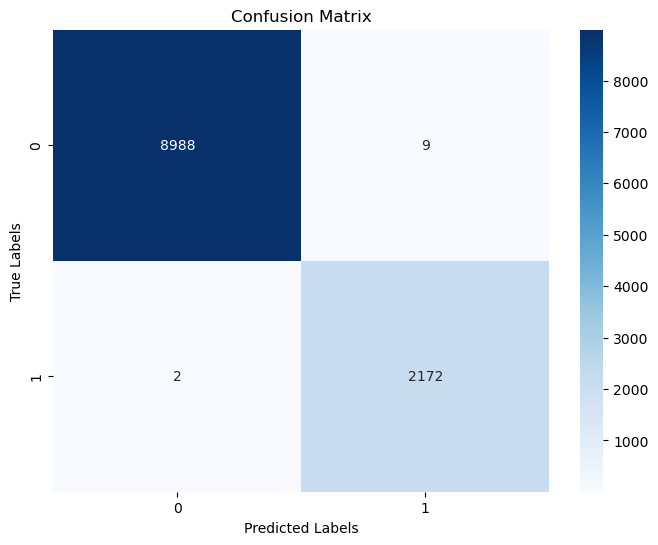

In [102]:
## v1 - 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test_concat)

y_pred_labels = (y_pred > 0.5).astype(int)
# y_test_labels = np.argmax(y_test_concat, axis=1) 
print(y_pred_labels.shape, y_test_concat.shape)

print(classification_report(y_test_concat, y_pred_labels))

conf_matrix = confusion_matrix(y_test_concat, y_pred_labels)

# 혼동행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

# 혼동행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(16956, 1) (16956,)
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.98      0.99     16956

    accuracy                           0.98     16956
   macro avg       0.50      0.49      0.50     16956
weighted avg       1.00      0.98      0.99     16956

Confusion Matrix:
[[    0     0]
 [  266 16690]]


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

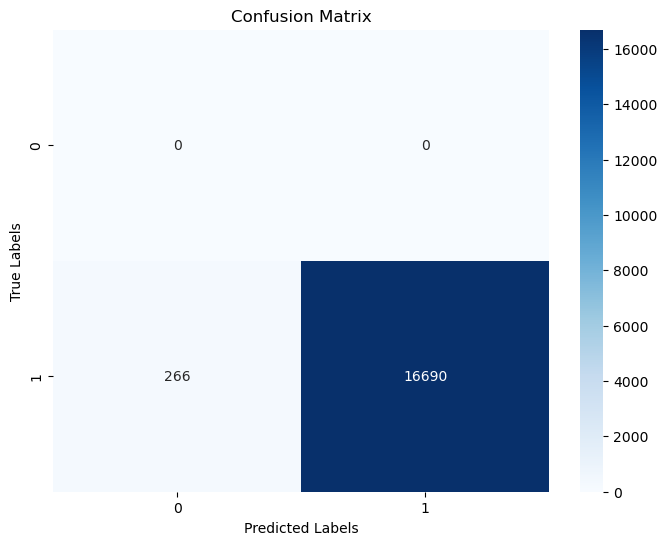

In [205]:
## v2 - 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(anomaly_splits_test_raw)

y_pred_labels = (y_pred > 0.5).astype(int)
# y_test_labels = np.argmax(y_test_concat, axis=1) 
print(y_pred_labels.shape, y_label_1_raw_test.shape)

print(classification_report(y_label_1_raw_test, y_pred_labels))

conf_matrix = confusion_matrix(y_label_1_raw_test, y_pred_labels)

# 혼동행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

# 혼동행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Classification with anomaly data

In [194]:
import glob
file_paths = glob.glob('./data/anomaly_data/*.csv')
exclude_files = [
    './data/anomaly_data/anomaly_7v_data2.csv',
    './data/anomaly_data/anomaly_7v_data1.csv'
]

file_paths = [file for file in file_paths if file not in exclude_files]

# df_list = []

# anomaly_splits = []
# for i in anomaly_file_paths:
#     data_df = pd.read_csv(file, header=None)

#     data_df_split_test = np.array_split(data_df, len(data_df) // DATA_SLICE_SIZE)
#     print(len(data_df_split_test))

#     anomaly_splits_test.append(data_df_split_test)
#     anomaly_splits.append(data_df_split)



In [195]:
labels = {
    '5v': 0,
    '3v': 0,
    'contact': 1,
    'unbalanced': 2
}

y_label_raw = []  

anomaly_splits = []


for file in file_paths:
    data_df = pd.read_csv(file, header=None)
    print(file)
    data_df = data_df[:len(data_df) - (len(data_df) % DATA_SLICE_SIZE)]

    data_df_split_test = np.array_split(data_df, len(data_df) // DATA_SLICE_SIZE)
    # print(len(data_df_split_test))

    
    for split in data_df_split_test:
        
        for key in labels.keys():
            if key in file:
                y_label = labels[key]
                break
        y_label_raw.append(y_label) 
        # print(split.shape, y_label)

    anomaly_splits.append(data_df_split_test)


y_label = np.array(y_label_raw)
x_concat = np.concatenate(anomaly_splits, axis = 0)

print(f"Labels: {y_label.shape}")
print(x_concat.shape)



./data/anomaly_data/anomaly_unstable_data.csv
./data/anomaly_data/anomaly_5v_data2.csv
./data/anomaly_data/anomaly_5v_data1.csv
./data/anomaly_data/anomaly_unbalanced_9v_data1.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future v

./data/anomaly_data/anomaly_3v_data1.csv
./data/anomaly_data/anomaly_3v_data2.csv
./data/anomaly_data/anomaly_on_off_data.csv
./data/anomaly_data/anomaly_tape_contact_data.csv
./data/anomaly_data/anomaly_wind_noise_data.csv
./data/anomaly_data/anomaly_unbalanced_12v_data1.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future v

./data/anomaly_data/anomaly_contact_12v_data1.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


./data/anomaly_data/anomaly_contact_9v_data1.csv


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (15240,) + inhomogeneous part.

In [158]:
unique, counts = np.unique(y_label, return_counts=True)
label_counts = dict(zip(unique, counts))

# 전체 개수 계산
total_count = len(y_label)

# 라벨 비율 계산
label_ratios = {label: count / total_count for label, count in label_counts.items()}

# 결과 출력
print("Label counts:", label_counts)
print("Label ratios:", label_ratios)

Label counts: {0: 7200, 1: 3600, 2: 3600}
Label ratios: {0: 0.5, 1: 0.25, 2: 0.25}


In [159]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x_concat, y_label, test_size=0.3, random_state=42, stratify=y_label)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (10080, 100, 3) (10080,)
Validation set: (2160, 100, 3) (2160,)
Test set: (2160, 100, 3) (2160,)


In [240]:
from keras.utils import to_categorical

# Convert y_train and y_valid to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=3)  # Assuming classes are 0, 1
y_valid_one_hot = to_categorical(y_val, num_classes=3)  # Assuming you have a similar y_valid
y_test_one_hot = to_categorical(y_test, num_classes=3)  # Assuming you have a similar y_test

# Check the shape
print(y_train_one_hot.shape)  # Should be (10070, 4)
print(y_valid_one_hot.shape) 
print(y_test_one_hot.shape) 

(10080, 3)
(2160, 3)
(2160, 3)


In [1]:
model = keras.models.Sequential([
    # Conv Block 1 
    keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu",
                        input_shape=[100, 3]),
    keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu"), 

    # Pooling layer
    keras.layers.MaxPooling1D(pool_size=2),

    # Conv Block 2 
    keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"),
    keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"),           
    
    # Pooling layer
    keras.layers.MaxPooling1D(pool_size=2),  

    # Conv Block 3
    keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"),
    keras.layers.Conv1D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"),   
    
    # Pooling layer        
    keras.layers.MaxPooling1D(pool_size=2),  

    # Conv Block 4
    # keras.layers.Conv1D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"),

    keras.layers.GlobalAveragePooling1D(),

    # Updated output layer for multi-class classification
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(3, activation="softmax")  # Change to 4 units and softmax activation
])

# Compile the model
model.compile(loss="categorical_crossentropy",  # Use categorical crossentropy
              optimizer="adam",
              metrics=["accuracy"])  # Accuracy metric is still appropriate

# Train the model
history = model.fit(
    x_train, y_train_one_hot,  # Ensure y_train is one-hot encoded for multi-class
    epochs=20,  
    batch_size=32,
    validation_data=(x_val, y_valid_one_hot),
    verbose=1,
    # class_weight=class_weights_dict,
    # callbacks=[early_stop]
)

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# # Save the model
model.save("conv_net_classification_1.h5")


NameError: name 'keras' is not defined

In [244]:
x_test.shape, y_pred.shape

((2160, 100, 3), (2160, 3))

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(2160,) (2160,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1080
           1       1.00      1.00      1.00       540
           2       1.00      1.00      1.00       540

    accuracy                           1.00      2160
   macro avg       1.00      1.00      1.00      2160
weighted avg       1.00      1.00      1.00      2160

Confusion Matrix:
[[1080    0    0]
 [   0  540    0]
 [   0    0  540]]


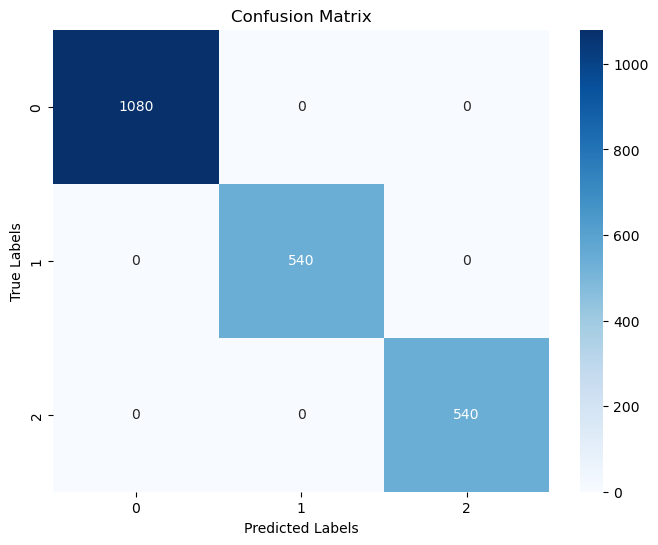

In [246]:
## v1 - before quantization
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# y_pred_labels = (y_pred > 0.5).astype(int)
# y_test_labels = np.argmax(x_test, axis=1) 
print(y_pred_classes.shape, y_test.shape)

print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 혼동행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

# 혼동행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [103]:
import tensorflow as tf
import numpy as np

# .h5 모델 로드
h5_model = tf.keras.models.load_model('conv_net_new_data_anomaly_15p_add_normal_and_anomaly_4.h5')

# .tflite 변환기 생성
converter = tf.lite.TFLiteConverter.from_keras_model(h5_model)

# 양자화 적용 (정수 양자화)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter._experimental_disable_per_channel_quantization_for_dense_layers = True

# INT8 양자화를 위해 필요한 대표적인 데이터셋 함수 정의
def representative_dataset():
    for i in range(1000):  # 임의로 100개의 샘플을 사용
        # X_windows_balanced에서 일부 샘플을 선택
        sample = x_train_concat[i]  # 각 sample의 shape은 (10, 3)
        # shape을 (1, 10, 3)로 맞추기 위해 배치 차원 추가
        yield [np.expand_dims(sample, axis=0).astype(np.float32)]

# # INT8 양자화를 위해 필요한 대표적인 데이터셋 함수 정의
# def representative_dataset():
#     for _ in range(100):
#         # (1, 10, 24)은 배치 크기 1, 10x24 크기의 입력 데이터를 의미합니다.
#         yield [np.random.rand(1, 10, 24).astype(np.float32)]

# # 대표 데이터셋 지정
converter.representative_dataset = representative_dataset

# 완전한 INT8 양자화를 위한 설정
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]  # INT8 연산만 허용
converter.inference_input_type = tf.int8  # 입력 타입을 INT8로 설정
converter.inference_output_type = tf.int8  # 출력 타입을 INT8로 설정


# .tflite 모델로 변환
tflite_model = converter.convert()

# .tflite 모델 저장
with open('conv_net_new_data_anomaly_15p_add_normal_and_anomaly_4.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/lx/t6fh69qs69d9s21bvsl3_ynr0000gn/T/tmp03qlkruh/assets


INFO:tensorflow:Assets written to: /var/folders/lx/t6fh69qs69d9s21bvsl3_ynr0000gn/T/tmp03qlkruh/assets


Saved artifact at '/var/folders/lx/t6fh69qs69d9s21bvsl3_ynr0000gn/T/tmp03qlkruh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 3), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  12173070704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12173074400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12173082320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12173215872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12173223264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12173226256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12173228896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12173228016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12173677968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12173680256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  12173682192: T

/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1730125942.255042 5113823 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1730125942.255274 5113823 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-10-28 23:32:22.256752: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/lx/t6fh69qs69d9s21bvsl3_ynr0000gn/T/tmp03qlkruh
2024-10-28 23:32:22.258135: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-10-28 23:32:22.258144: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/lx/t6fh69qs69d9s21bvsl3_ynr0000gn/T/tmp03qlkruh
2024-10-28 23:32:22.267348: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-10-28 23:32:22.313

### Model quantization and evaluation 

conv net -> 0, 1 anomaly detection

In [251]:
# TFLite 모델 로드
interpreter = tf.lite.Interpreter(model_path="./conv_net_new_data_anomaly_15p_2.tflite")
interpreter.allocate_tensors()

# 입력과 출력 텐서의 세부 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 입력과 출력의 스케일 및 제로 포인트 정보 추출
input_scale, input_zero_point = input_details[0]['quantization']
output_scale, output_zero_point = output_details[0]['quantization']
input_index = input_details[0]['index']
output_index = output_details[0]['index']
print(input_scale, input_zero_point, output_scale, output_zero_point)

y_pred = []

# 입력 데이터에 대해 예측 수행
for i in range(len(x_test_concat)):
    # 입력 데이터를 INT8 형식에 맞게 양자화
    input_data = (x_test_concat[i] / input_scale + input_zero_point).astype(np.int8)
    input_data = np.expand_dims(input_data, axis=0)  # 배치 차원 추가

    interpreter.set_tensor(input_index, input_data)
    interpreter.invoke()

    # 출력 데이터도 다시 float32로 변환
    output_data = interpreter.get_tensor(output_index)
    output_data = output_scale * (output_data.astype(np.float32) - output_zero_point)

    # y_pred.append(output_data.squeeze())  # 또는 output_data[0]으로 차원 축소 가능
    y_pred.append(output_data[0])
    # print(output_data)

# y_pred = model.predict(x_test_concat, verbose=1)
y_pred = np.array(y_pred)
print(y_pred)
y_pred_classes = (y_pred >= 0.25).astype(int)
print(y_pred)
print(max(y_pred))
print(min(y_pred))




0.004703619983047247 -121 0.00390625 -128
[[0. ]
 [0. ]
 [0. ]
 ...
 [0.5]
 [0.5]
 [0.5]]
[[0. ]
 [0. ]
 [0. ]
 ...
 [0.5]
 [0.5]
 [0.5]]
[0.5]
[0.]


(1734, 1)
(1734, 1) (1734,)
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1440
         1.0       0.94      1.00      0.97       294

    accuracy                           0.99      1734
   macro avg       0.97      0.99      0.98      1734
weighted avg       0.99      0.99      0.99      1734

Confusion Matrix:
[[1420   20]
 [   0  294]]


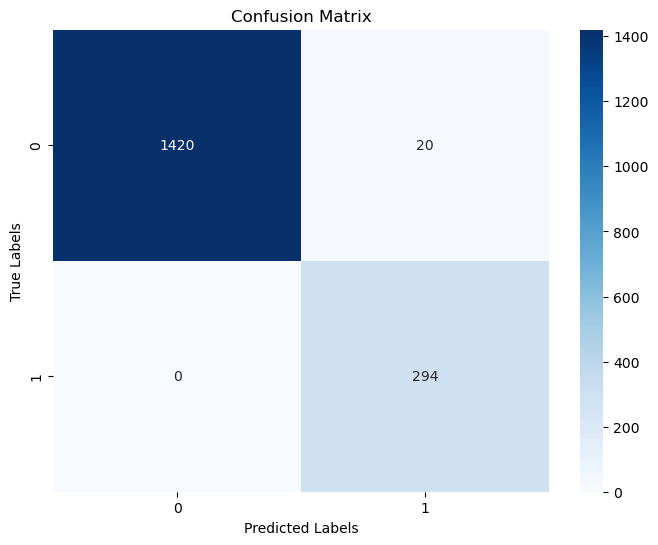

In [252]:
print(y_pred_classes.shape)

## v3 - after quantizer
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print(y_pred_classes.shape, y_test_concat.shape)

print(classification_report(y_test_concat, y_pred_classes))

conf_matrix = confusion_matrix(y_test_concat, y_pred_classes)

# 혼동행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

# 혼동행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

(16956, 1)
(16956, 1) (16956,)
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.99      0.99     16956

    accuracy                           0.99     16956
   macro avg       0.50      0.50      0.50     16956
weighted avg       1.00      0.99      0.99     16956

Confusion Matrix:
[[    0     0]
 [  169 16787]]


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

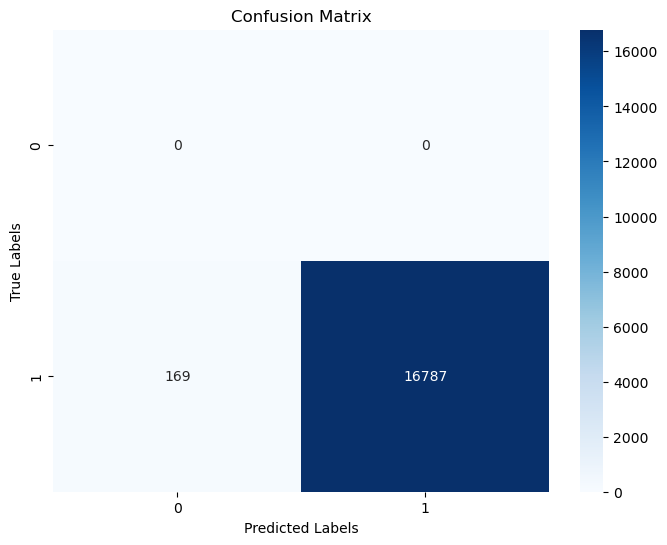

In [236]:
print(y_pred_classes.shape)

## v4 - after quantizer - only anomaly data
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

print(y_pred_classes.shape, y_label_1_raw_test.shape)

print(classification_report(y_label_1_raw_test, y_pred_classes))

conf_matrix = confusion_matrix(y_label_1_raw_test, y_pred_classes)

# 혼동행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

# 혼동행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



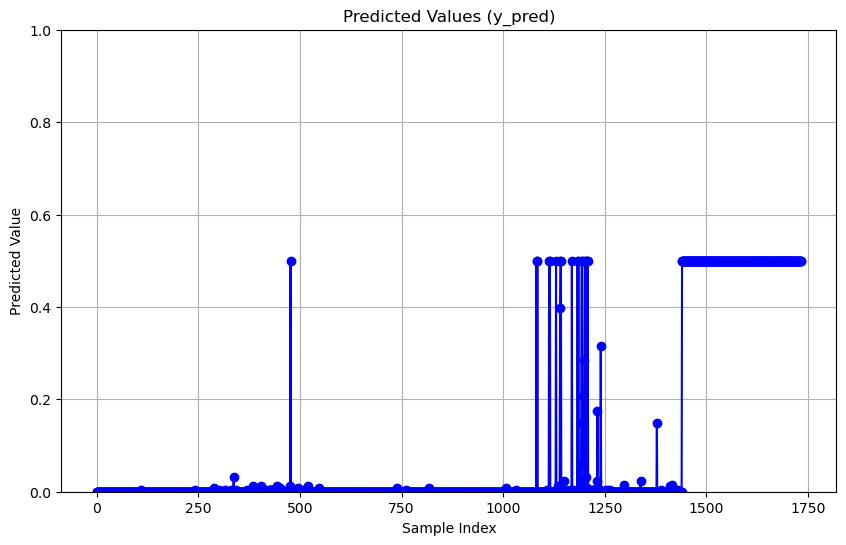

In [211]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred, marker='o', linestyle='-', color='b')
plt.title('Predicted Values (y_pred)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.ylim(0, 1)  # Setting the y-axis to range from 0 to 1 for clarity
plt.grid(True)
plt.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


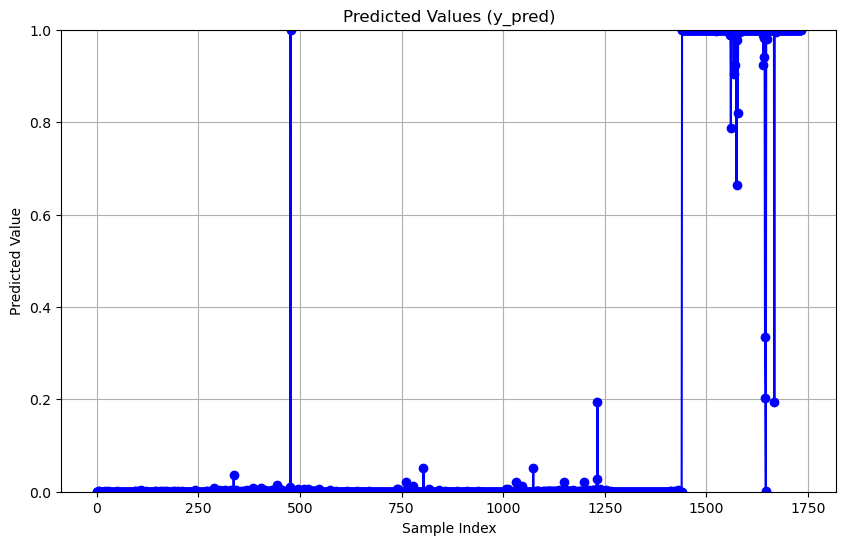

In [218]:
y_pred = model.predict(x_test_concat)
plt.figure(figsize=(10, 6))
plt.plot(y_pred, marker='o', linestyle='-', color='b')
plt.title('Predicted Values (y_pred)')
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.ylim(0, 1)  # Setting the y-axis to range from 0 to 1 for clarity
plt.grid(True)
plt.show()

### Model quantization and evaluation 

conv net -> 0, 1, 2 anomaly judgement

In [249]:
# TFLite 모델 로드
interpreter = tf.lite.Interpreter(model_path="./conv_net_classification_1.tflite")
interpreter.allocate_tensors()

# 입력과 출력 텐서의 세부 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 입력과 출력의 스케일 및 제로 포인트 정보 추출
input_scale, input_zero_point = input_details[0]['quantization']
output_scale, output_zero_point = output_details[0]['quantization']
input_index = input_details[0]['index']
output_index = output_details[0]['index']
print(input_scale, input_zero_point, output_scale, output_zero_point)

y_pred = []

# 입력 데이터에 대해 예측 수행
for i in range(len(x_test)):
    # 입력 데이터를 INT8 형식에 맞게 양자화
    input_data = (x_test[i] / input_scale + input_zero_point).astype(np.int8)
    input_data = np.expand_dims(input_data, axis=0)  # 배치 차원 추가

    interpreter.set_tensor(input_index, input_data)
    interpreter.invoke()

    # 출력 데이터도 다시 float32로 변환
    output_data = interpreter.get_tensor(output_index)
    output_data = output_scale * (output_data.astype(np.float32) - output_zero_point)

    # y_pred.append(output_data.squeeze())  # 또는 output_data[0]으로 차원 축소 가능
    y_pred.append(output_data[0])
    # print(output_data)

# y_pred = model.predict(x_test_concat, verbose=1)
y_pred = np.array(y_pred)
print(y_pred)
y_pred_classes = np.argmax(y_pred, axis=1)

# print(max(y_pred))
# print(min(y_pred))




0.01722520776093006 25 0.00390625 -128
[[0.99609375 0.         0.        ]
 [0.         0.         0.99609375]
 [0.         0.         0.99609375]
 ...
 [0.99609375 0.         0.        ]
 [0.99609375 0.         0.        ]
 [0.99609375 0.         0.        ]]


(2160,) (2160,)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1080
           1       1.00      1.00      1.00       540
           2       1.00      1.00      1.00       540

    accuracy                           1.00      2160
   macro avg       1.00      1.00      1.00      2160
weighted avg       1.00      1.00      1.00      2160

Confusion Matrix:
[[1080    0    0]
 [   0  540    0]
 [   0    0  540]]


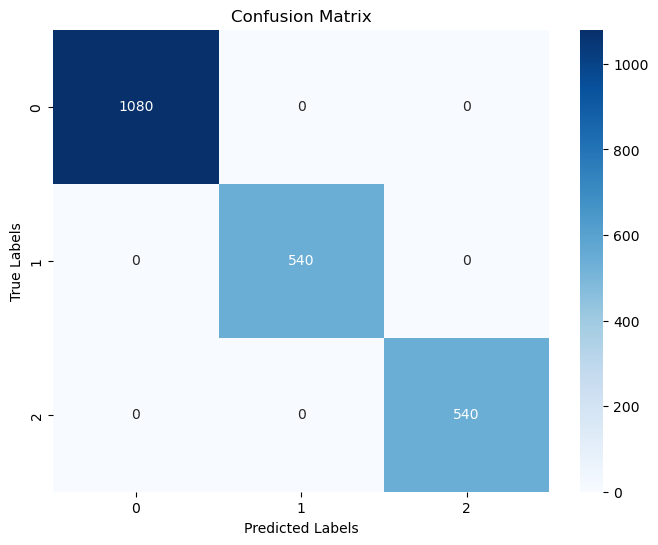

In [250]:
## v1 - after quantization
from sklearn.metrics import confusion_matrix, classification_report
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_pred_labels = (y_pred > 0.5).astype(int)
# y_test_labels = np.argmax(x_test, axis=1) 
print(y_pred_classes.shape, y_test.shape)

print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 혼동행렬 출력
print("Confusion Matrix:")
print(conf_matrix)

# 혼동행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()